In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [2]:
#Loading the dataset
data = pd.read_csv(r"Tech_hr_data.csv")
data.head(10)

,Employee_ID,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions,Turnover,Turnover_Description
0,EMP0001,60,Male,Marketing,Engineer,24,2,80818,Campus Recruitment,1.9,7,3,1,4,26,78,0,0,Retention
1,EMP0002,50,Male,Marketing,Specialist,28,2,59932,Campus Recruitment,4.5,4,4,0,2,26,30,3,0,Retention
2,EMP0003,36,Female,Finance,Analyst,18,4,36901,Job Board,3.7,0,1,0,5,18,86,3,0,Retention
3,EMP0004,64,Male,Finance,Manager,3,4,38597,Campus Recruitment,2.2,7,4,1,3,32,28,4,0,Retention
4,EMP0005,29,Female,Marketing,Manager,22,3,93909,Campus Recruitment,2.1,8,4,0,2,14,45,2,0,Retention
5,EMP0006,42,Female,Engineering,Specialist,6,5,102391,Job Board,3.9,9,1,0,3,47,80,4,1,Turnover
6,EMP0007,60,Male,Finance,Manager,27,3,114214,Internal Referral,4.9,1,1,0,3,3,82,1,0,Retention
7,EMP0008,40,Male,Sales,Engineer,27,5,38263,Job Board,2.4,8,4,0,3,1,79,1,1,Turnover
8,EMP0009,44,Male,Sales,Engineer,3,2,93293,Internal Referral,4.3,7,2,0,2,26,69,3,0,Retention
9,EMP0010,32,Female,Sales,Manager,21,1,55805,Job Board,3.0,6,5,1,5,24,54,3,1,Turnover


In [3]:
Target = data["Turnover"]
Target

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    0
997    1
998    0
999    0
Name: Turnover, Length: 1000, dtype: int64

In [4]:
#checking for basic data information
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee_ID           1000 non-null   object 
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   Department            1000 non-null   object 
 4   Position              1000 non-null   object 
 5   Tenure                1000 non-null   int64  
 6   Performance_Rating    1000 non-null   int64  
 7   Salary                1000 non-null   int64  
 8   Recruitment_Source    1000 non-null   object 
 9   Satisfaction_Score    1000 non-null   float64
 10  Last_Promotion_Years  1000 non-null   int64  
 11  Work_Life_Balance     1000 non-null   int64  
 12  Overworked            1000 non-null   int64  
 13  Job_Satisfaction      1000 non-null   int64  
 14  Distance_From_Work    1000 non-null   int64  
 15  Commute_Time          

(1000, 19)

In [5]:
#checking for statistical information of the data
data.describe()

,Age,Tenure,Performance_Rating,Salary,Satisfaction_Score,Last_Promotion_Years,Work_Life_Balance,Overworked,Job_Satisfaction,Distance_From_Work,Commute_Time,Number_Of_Promotions,Turnover
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,43.014000,14.443000,3.006000,74303.769000,3.485100,4.560000,2.94000,0.312000,3.049000,24.76600,51.92500,2.059000,0.19300
std,12.333772,8.567506,1.417029,26342.205416,0.979698,2.959249,1.45276,0.463542,1.424299,13.89872,21.64088,1.431631,0.39485
min,22.000000,0.000000,1.000000,30287.000000,0.500000,0.000000,1.00000,0.000000,1.000000,1.00000,15.00000,0.000000,0.00000
25%,32.000000,7.000000,2.000000,50912.500000,2.800000,2.000000,2.00000,0.000000,2.000000,13.00000,33.00000,1.000000,0.00000
50%,44.000000,14.000000,3.000000,74239.500000,3.500000,5.000000,3.00000,0.000000,3.000000,24.00000,52.00000,2.000000,0.00000
75%,54.000000,22.000000,4.000000,97722.500000,4.125000,7.000000,4.00000,1.000000,4.000000,37.00000,71.00000,3.000000,0.00000
max,64.000000,29.000000,5.000000,119959.000000,7.600000,9.000000,5.00000,1.000000,5.000000,49.00000,89.00000,4.000000,1.00000


In [6]:
#checking for missing values
data.isnull().sum()

Employee_ID             0
Age                     0
Gender                  0
Department              0
Position                0
Tenure                  0
Performance_Rating      0
Salary                  0
Recruitment_Source      0
Satisfaction_Score      0
Last_Promotion_Years    0
Work_Life_Balance       0
Overworked              0
Job_Satisfaction        0
Distance_From_Work      0
Commute_Time            0
Number_Of_Promotions    0
Turnover                0
Turnover_Description    0
dtype: int64

In [7]:
#Checking for unique variables
data.nunique()

Employee_ID             1000
Age                       43
Gender                     2
Department                 4
Position                   4
Tenure                    30
Performance_Rating         5
Salary                   997
Recruitment_Source         3
Satisfaction_Score        59
Last_Promotion_Years      10
Work_Life_Balance          5
Overworked                 2
Job_Satisfaction           5
Distance_From_Work        49
Commute_Time              75
Number_Of_Promotions       5
Turnover                   2
Turnover_Description       2
dtype: int64

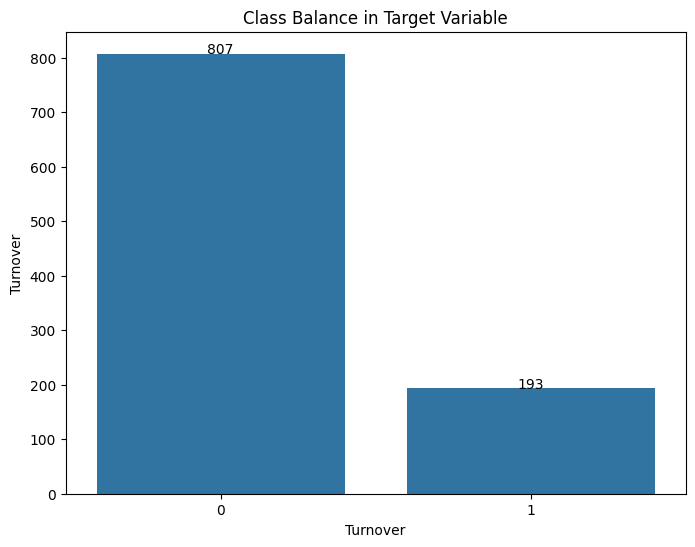

In [8]:
data['Turnover'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Turnover')
plt.title('Class Balance in Target Variable')
plt.xlabel('Turnover')
plt.ylabel('Turnover')

# Adding value counts
value_counts = data['Turnover'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()

In [9]:
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Position', 'Tenure',
       'Performance_Rating', 'Salary', 'Recruitment_Source',
       'Satisfaction_Score', 'Last_Promotion_Years', 'Work_Life_Balance',
       'Overworked', 'Job_Satisfaction', 'Distance_From_Work', 'Commute_Time',
       'Number_Of_Promotions', 'Turnover', 'Turnover_Description'],
      dtype='object')

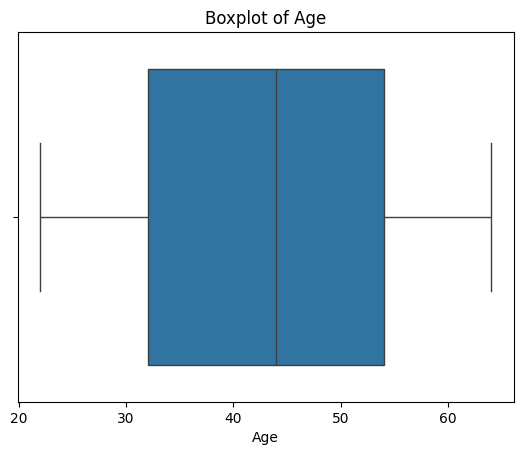

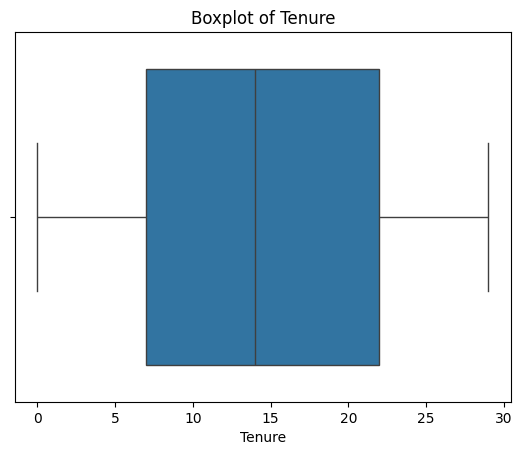

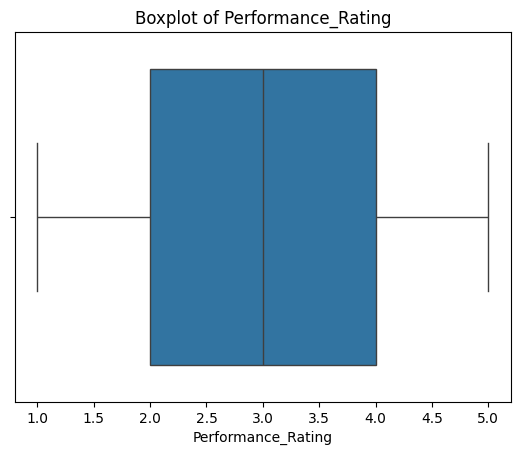

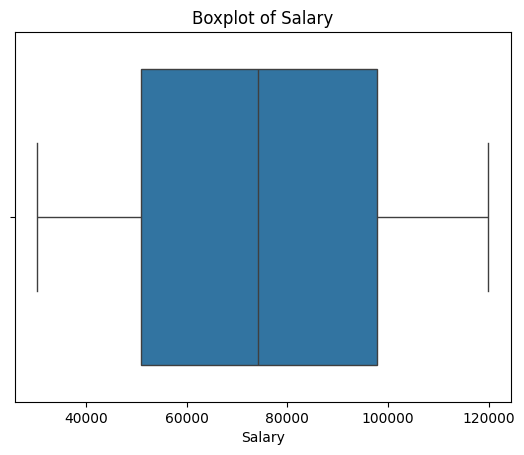

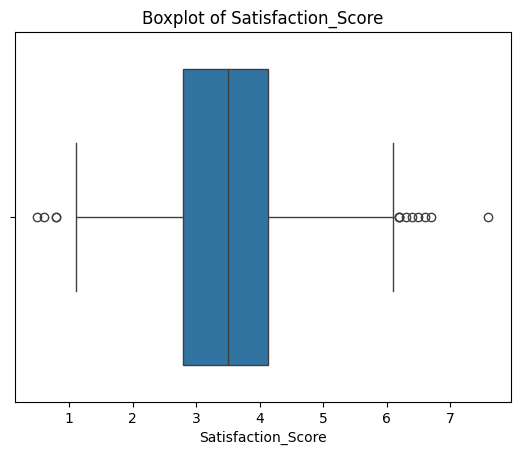

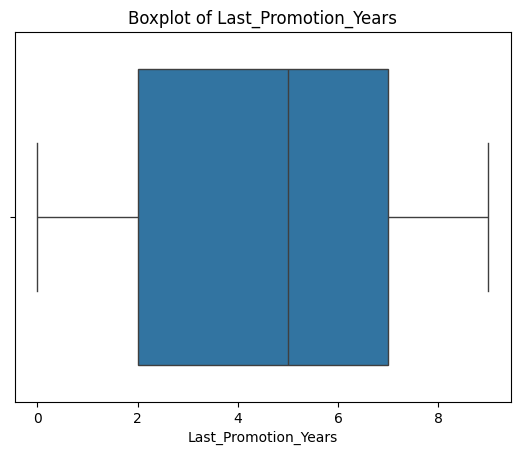

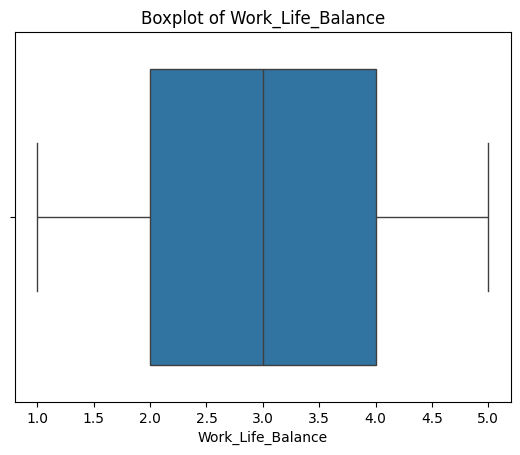

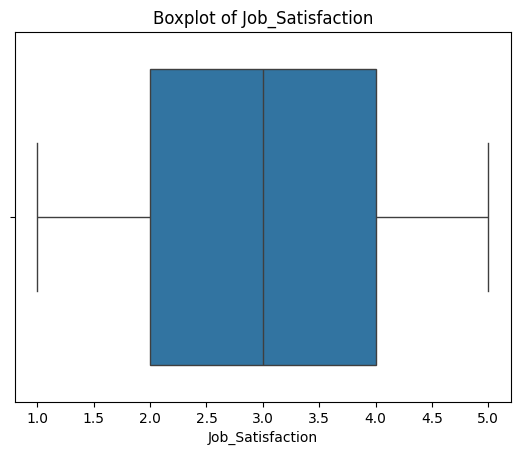

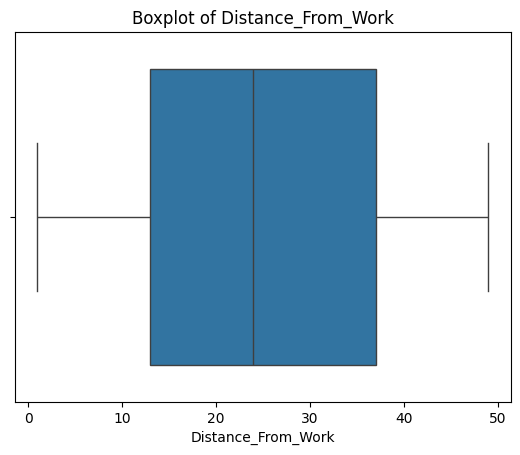

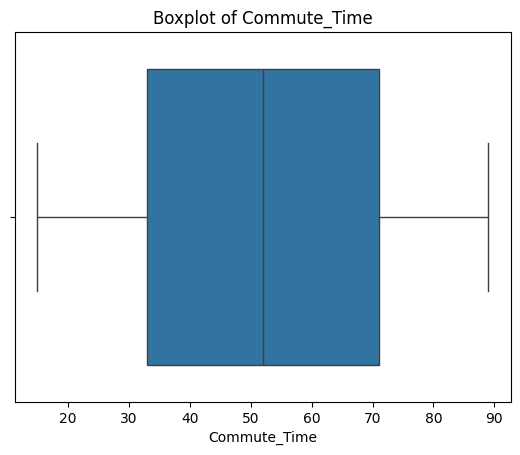

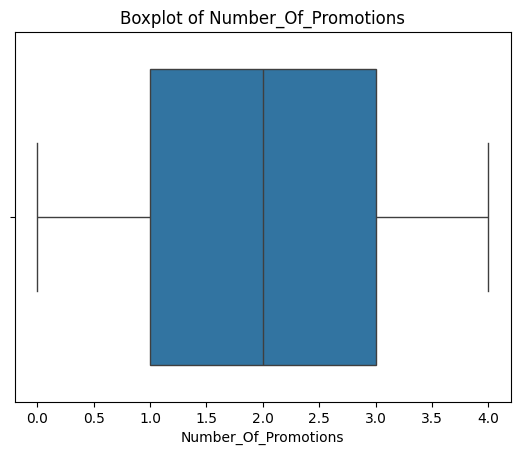

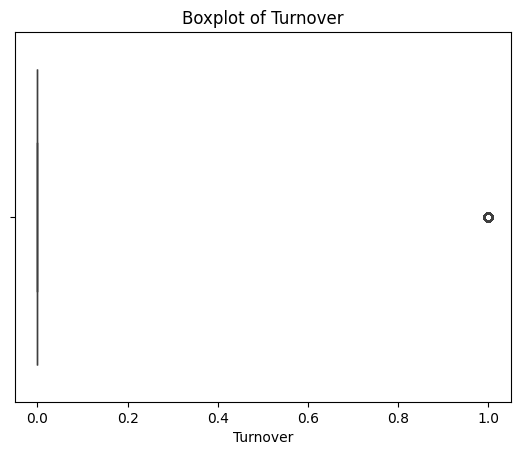

In [10]:
#Checking for outliers
# Selecting only numerical columns
numerical_columns = ['Age', 'Tenure', 'Performance_Rating', 'Salary', 'Satisfaction_Score',
                     'Last_Promotion_Years', 'Work_Life_Balance', 'Job_Satisfaction',
                     'Distance_From_Work', 'Commute_Time', 'Number_Of_Promotions', 'Turnover']

# Iterating through each numerical column
for column in numerical_columns:
    # Creating a boxplot for the current column
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [11]:
# Data Cleaning and Processing

# Check for missing values
missing_values = data.isnull().sum()

# Encode categorical variables
data['Gender'] = data['Gender'].astype('category').cat.codes
data['Department'] = data['Department'].astype('category').cat.codes
data['Position'] = data['Position'].astype('category').cat.codes
data['Recruitment_Source'] = data['Recruitment_Source'].astype('category').cat.codes
data['Turnover_Description'] = data['Turnover_Description'].astype('category').cat.codes

# Drop 'Employee_ID' as it's a unique identifier not useful for modeling
data_processed = data.drop(['Employee_ID'], axis=1)

missing_values, data_processed.head(5)


(Employee_ID             0
 Age                     0
 Gender                  0
 Department              0
 Position                0
 Tenure                  0
 Performance_Rating      0
 Salary                  0
 Recruitment_Source      0
 Satisfaction_Score      0
 Last_Promotion_Years    0
 Work_Life_Balance       0
 Overworked              0
 Job_Satisfaction        0
 Distance_From_Work      0
 Commute_Time            0
 Number_Of_Promotions    0
 Turnover                0
 Turnover_Description    0
 dtype: int64,
    Age  Gender  Department  Position  Tenure  Performance_Rating  Salary  \
 0   60       1           2         1      24                   2   80818   
 1   50       1           2         3      28                   2   59932   
 2   36       0           1         0      18                   4   36901   
 3   64       1           1         2       3                   4   38597   
 4   29       0           2         2      22                   3   93909   
 
    Recr

<ipython-input-12-951cf2f996b6>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Female', 'Male'])


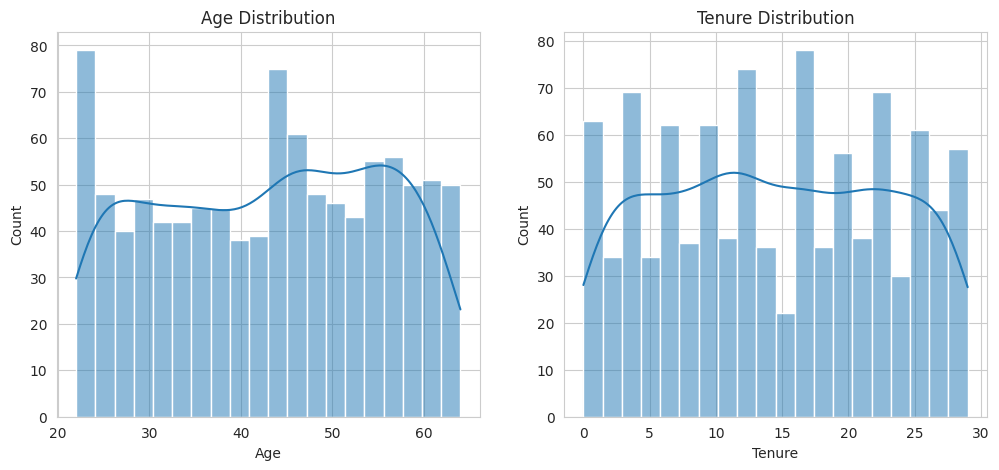

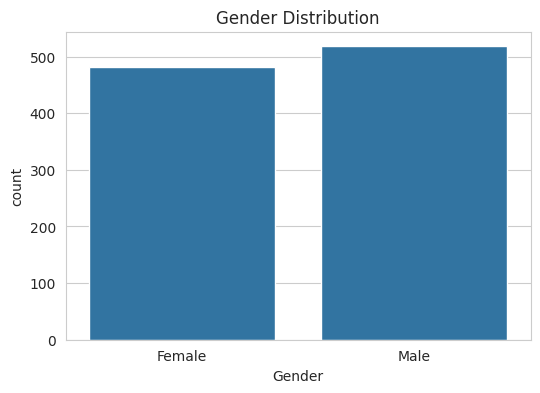

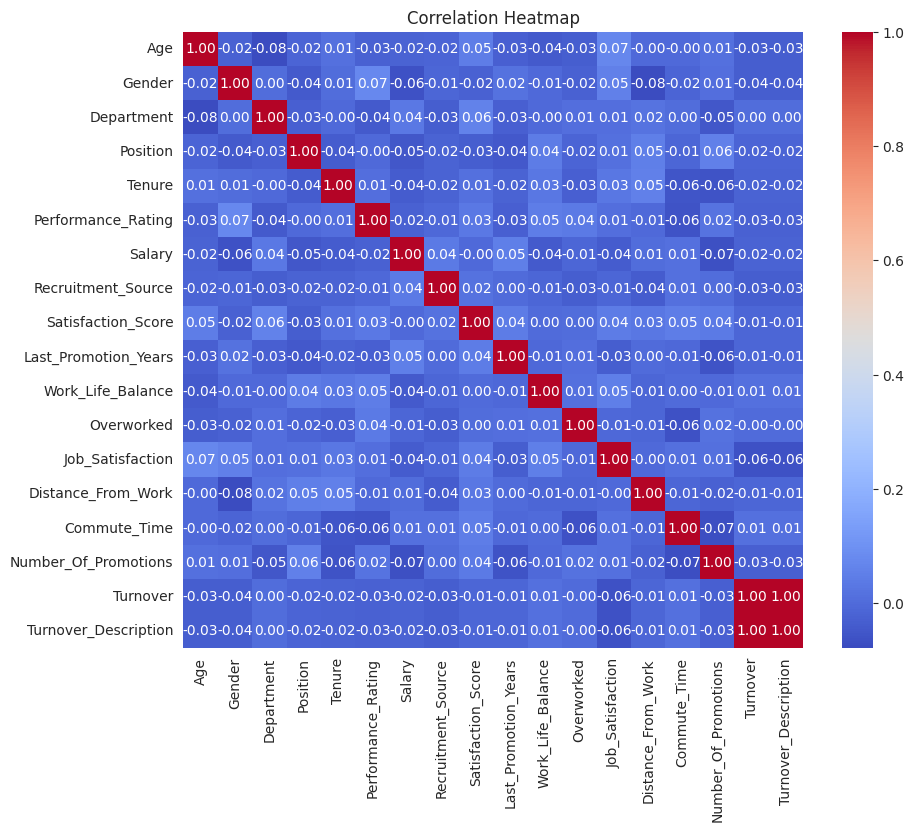

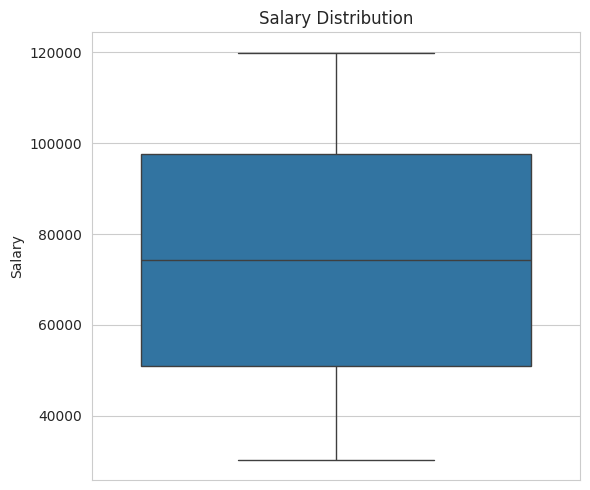

In [12]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for age and tenure distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data_processed['Age'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')
sns.histplot(data_processed['Tenure'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Tenure Distribution')

# Bar chart for gender distribution
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='Gender', data=data_processed)
ax.set_title('Gender Distribution')
ax.set_xticklabels(['Female', 'Male'])

# Heatmap to show correlations
fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = data_processed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Box plot for Salary to identify outliers
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(y=data_processed['Salary'])
ax.set_title('Salary Distribution')

plt.tight_layout()
plt.show()


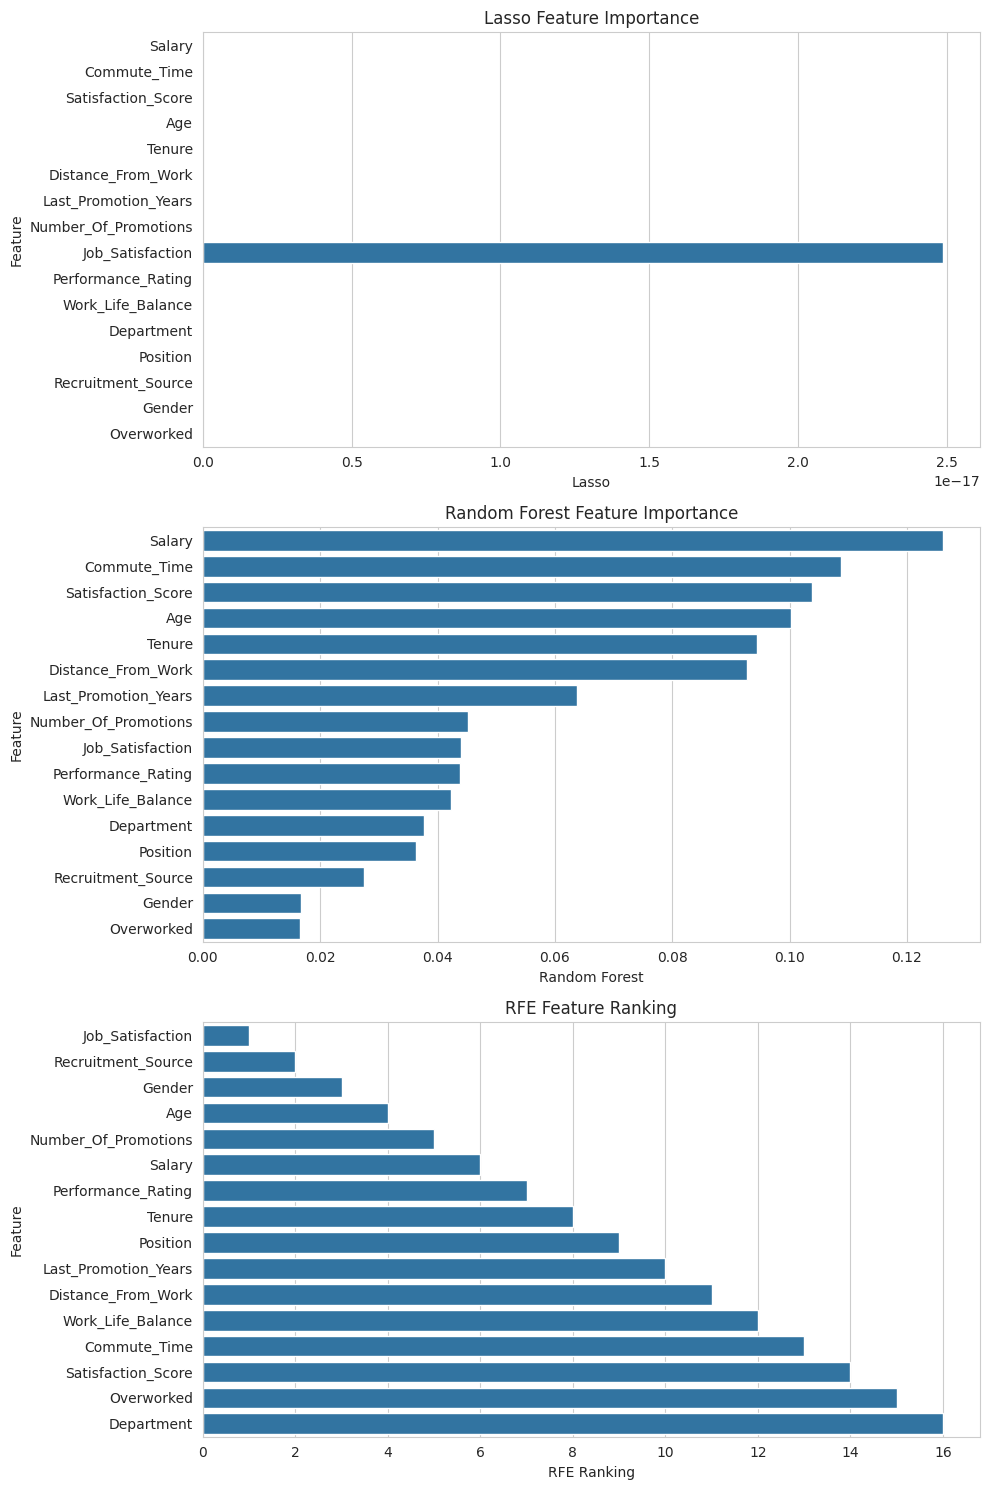

,Feature,Lasso,Random Forest,RFE Ranking
6,Salary,0.00,0.13,6
14,Commute_Time,0.00,0.11,13
8,Satisfaction_Score,0.00,0.10,14
0,Age,0.00,0.10,4
4,Tenure,0.00,0.09,8
13,Distance_From_Work,0.00,0.09,11
9,Last_Promotion_Years,0.00,0.06,10
15,Number_Of_Promotions,0.00,0.05,5
12,Job_Satisfaction,0.00,0.04,1
5,Performance_Rating,0.00,0.04,7


In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Feature Engineering
# Assuming 'Turnover' is our target variable, we'll prepare features and target
X = data_processed.drop(['Turnover', 'Turnover_Description'], axis=1)
y = data_processed['Turnover']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize models for feature importance
log_reg = LogisticRegression(max_iter=10000)
lasso = LassoCV(cv=5)
rf = RandomForestClassifier(n_estimators=100)

# Lasso for feature importance
lasso.fit(X_scaled, y)
lasso_importance = np.abs(lasso.coef_)

# Random Forest for feature importance
rf.fit(X_scaled, y)
rf_importance = rf.feature_importances_

# Recursive Feature Elimination with Logistic Regression
rfe = RFE(estimator=log_reg, n_features_to_select=1, step=1)
rfe.fit(X_scaled, y)
rfe_ranking = rfe.ranking_

# Combining importances
feature_names = X.columns
importances = pd.DataFrame({
    'Feature': feature_names,
    'Lasso': lasso_importance,
    'Random Forest': rf_importance,
    'RFE Ranking': rfe_ranking
}).sort_values('Random Forest', ascending=False)

# Plotting feature importances
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(x='Lasso', y='Feature', data=importances, ax=ax[0])
ax[0].set_title('Lasso Feature Importance')
sns.barplot(x='Random Forest', y='Feature', data=importances, ax=ax[1])
ax[1].set_title('Random Forest Feature Importance')
sns.barplot(x='RFE Ranking', y='Feature', data=importances.sort_values('RFE Ranking'), ax=ax[2])
ax[2].set_title('RFE Feature Ranking')

plt.tight_layout()
plt.show()

importances


In [20]:
data_dummies = pd.get_dummies(data)


In [21]:
data_dummies.head()


,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,...,Employee_ID_EMP0991,Employee_ID_EMP0992,Employee_ID_EMP0993,Employee_ID_EMP0994,Employee_ID_EMP0995,Employee_ID_EMP0996,Employee_ID_EMP0997,Employee_ID_EMP0998,Employee_ID_EMP0999,Employee_ID_EMP1000
0,60,1,2,1,24,2,80818,0,1.90,7,...,False,False,False,False,False,False,False,False,False,False
1,50,1,2,3,28,2,59932,0,4.50,4,...,False,False,False,False,False,False,False,False,False,False
2,36,0,1,0,18,4,36901,2,3.70,0,...,False,False,False,False,False,False,False,False,False,False
3,64,1,1,2,3,4,38597,0,2.20,7,...,False,False,False,False,False,False,False,False,False,False
4,29,0,2,2,22,3,93909,0,2.10,8,...,False,False,False,False,False,False,False,False,False,False





#Building Classification Models

```



In [23]:
data_dummies.to_csv('turnover_encoded.csv')


In [25]:
new_data = data_dummies.copy()
new_data


,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,...,Employee_ID_EMP0991,Employee_ID_EMP0992,Employee_ID_EMP0993,Employee_ID_EMP0994,Employee_ID_EMP0995,Employee_ID_EMP0996,Employee_ID_EMP0997,Employee_ID_EMP0998,Employee_ID_EMP0999,Employee_ID_EMP1000
0,60,1,2,1,24,2,80818,0,1.90,7,...,False,False,False,False,False,False,False,False,False,False
1,50,1,2,3,28,2,59932,0,4.50,4,...,False,False,False,False,False,False,False,False,False,False
2,36,0,1,0,18,4,36901,2,3.70,0,...,False,False,False,False,False,False,False,False,False,False
3,64,1,1,2,3,4,38597,0,2.20,7,...,False,False,False,False,False,False,False,False,False,False
4,29,0,2,2,22,3,93909,0,2.10,8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,0,0,3,24,3,88502,1,4.70,7,...,False,False,False,False,False,True,False,False,False,False
996,25,1,2,2,17,4,78849,2,3.50,7,...,False,False,False,False,False,False,True,False,False,False
997,43,0,0,0,18,5,56347,2,4.90,5,...,False,False,False,False,False,False,False,True,False,False
998,23,0,0,1,22,3,79056,1,3.30,9,...,False,False,False,False,False,False,False,False,True,False


#Train Test Split

In [26]:
new_data.head()

,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,...,Employee_ID_EMP0991,Employee_ID_EMP0992,Employee_ID_EMP0993,Employee_ID_EMP0994,Employee_ID_EMP0995,Employee_ID_EMP0996,Employee_ID_EMP0997,Employee_ID_EMP0998,Employee_ID_EMP0999,Employee_ID_EMP1000
0,60,1,2,1,24,2,80818,0,1.90,7,...,False,False,False,False,False,False,False,False,False,False
1,50,1,2,3,28,2,59932,0,4.50,4,...,False,False,False,False,False,False,False,False,False,False
2,36,0,1,0,18,4,36901,2,3.70,0,...,False,False,False,False,False,False,False,False,False,False
3,64,1,1,2,3,4,38597,0,2.20,7,...,False,False,False,False,False,False,False,False,False,False
4,29,0,2,2,22,3,93909,0,2.10,8,...,False,False,False,False,False,False,False,False,False,False


In [27]:
x=new_data.drop('Turnover',axis=1)
x

,Age,Gender,Department,Position,Tenure,Performance_Rating,Salary,Recruitment_Source,Satisfaction_Score,Last_Promotion_Years,...,Employee_ID_EMP0991,Employee_ID_EMP0992,Employee_ID_EMP0993,Employee_ID_EMP0994,Employee_ID_EMP0995,Employee_ID_EMP0996,Employee_ID_EMP0997,Employee_ID_EMP0998,Employee_ID_EMP0999,Employee_ID_EMP1000
0,60,1,2,1,24,2,80818,0,1.90,7,...,False,False,False,False,False,False,False,False,False,False
1,50,1,2,3,28,2,59932,0,4.50,4,...,False,False,False,False,False,False,False,False,False,False
2,36,0,1,0,18,4,36901,2,3.70,0,...,False,False,False,False,False,False,False,False,False,False
3,64,1,1,2,3,4,38597,0,2.20,7,...,False,False,False,False,False,False,False,False,False,False
4,29,0,2,2,22,3,93909,0,2.10,8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,0,0,3,24,3,88502,1,4.70,7,...,False,False,False,False,False,True,False,False,False,False
996,25,1,2,2,17,4,78849,2,3.50,7,...,False,False,False,False,False,False,True,False,False,False
997,43,0,0,0,18,5,56347,2,4.90,5,...,False,False,False,False,False,False,False,True,False,False
998,23,0,0,1,22,3,79056,1,3.30,9,...,False,False,False,False,False,False,False,False,True,False


In [28]:
y=data['Turnover']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    0
997    1
998    0
999    0
Name: Turnover, Length: 1000, dtype: int64

#Experimenting with SVC Model


In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

# Instantiate the SVC model
model = SVC(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [36]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [37]:
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.7750

Confusion Matrix:
[[155   0]
 [ 45   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       155
           1       0.00      0.00      0.00        45

    accuracy                           0.78       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.60      0.78      0.68       200



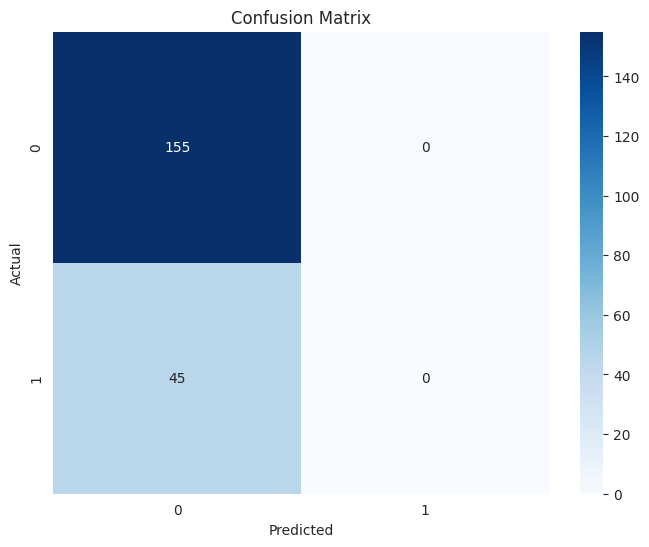

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Low Performance is Observed, which maybe due to the Imbalance dataset


#Improving model performance by using SMOTE to make the dataset balanced

In [40]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.25)


In [45]:
model_sm = SVC(random_state=42,max_iter=1000)
model_sm.fit(xr_train, yr_train)
y_pred_sm = model_sm.predict(xr_test)

accuracy_lr = accuracy_score(yr_test, y_pred_sm)
conf_matrix_lr = confusion_matrix(yr_test, y_pred_sm)
classification_rep_lr = classification_report(yr_test, y_pred_sm)

In [46]:
print(f"Accuracy: {accuracy_lr:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_lr)
print("\nClassification Report:")
print(classification_rep_lr)

Accuracy: 0.5643

Confusion Matrix:
[[ 2 61]
 [ 0 77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        63
           1       0.56      1.00      0.72        77

    accuracy                           0.56       140
   macro avg       0.78      0.52      0.39       140
weighted avg       0.76      0.56      0.42       140



#Experimenting 26 different algorithms from Lazypredict library

In [16]:
pip install lazypredict


In [17]:
from lazypredict.Supervised import LazyClassifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)


 97%|█████████▋| 28/29 [00:07<00:00,  3.38it/s]

[LightGBM] [Info] Number of positive: 148, number of negative: 652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.185000 -> initscore=-1.482832
[LightGBM] [Info] Start training from score -1.482832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:07<00:00,  3.64it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.76               0.54     0.54      0.71   
KNeighborsClassifier               0.77               0.51     0.51      0.69   
QuadraticDiscriminantAnalysis      0.77               0.50     0.50      0.68   
LGBMClassifier                     0.76               0.50     0.50      0.68   
SVC                                0.78               0.50     0.50      0.68   
RidgeClassifierCV                  0.78               0.50     0.50      0.68   
RidgeClassifier                    0.78               0.50     0.50      0.68   
LogisticRegression                 0.78               0.50     0.50      0.68   
LinearDiscriminantAnalysis         0.78               0.50     0.50      0.68   
LinearSVC                          0.78               0.50     0.50      0.68   
GaussianNB                  

 97%|█████████▋| 28/29 [00:08<00:00,  1.63it/s]

[LightGBM] [Info] Number of positive: 148, number of negative: 652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.185000 -> initscore=-1.482832
[LightGBM] [Info] Start training from score -1.482832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

100%|██████████| 29/29 [00:09<00:00,  3.15it/s]


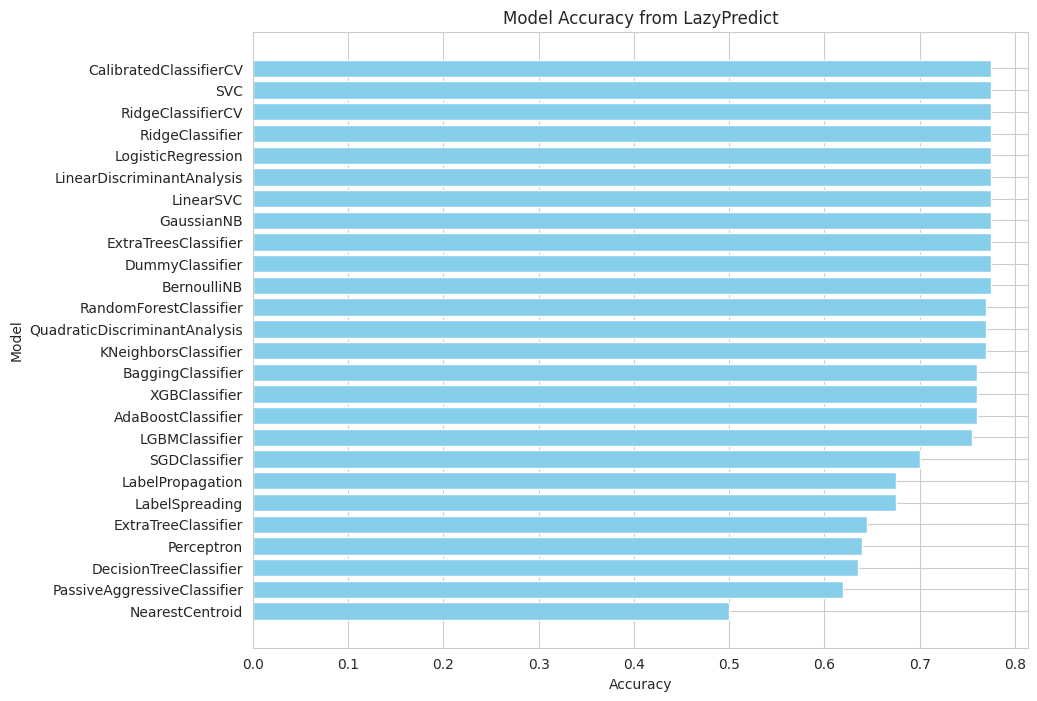

In [18]:
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Assuming X_scaled and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Convert the models DataFrame to a more plot-friendly format
models_sorted = models.sort_values('Accuracy', ascending=False)  # Sorting by Accuracy for better visualization

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(models_sorted.index, models_sorted['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy from LazyPredict')
plt.gca().invert_yaxis()  # To display the highest accuracy at the top
plt.show()


#Optimising performance by Hyper parameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Logistic Regression parameters
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Random Forest parameters
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

# SVC parameters
svc_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# XGBClassifier parameters
xgb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'colsample_bytree': [0.7, 0.8, 1]
}

# Instantiate the models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV or RandomizedSearchCV for each model
# Note: Depending on your computational resources and time, you might prefer RandomizedSearchCV over GridSearchCV

# Logistic Regression
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, verbose=1, scoring='accuracy')
log_reg_grid.fit(X_train, y_train)

# Random Forest
rf_grid = GridSearchCV(rf, rf_params, cv=5, verbose=1, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# SVC
svc_grid = GridSearchCV(svc, svc_params, cv=5, verbose=1, scoring='accuracy')
svc_grid.fit(X_train, y_train)

# XGBClassifier
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, verbose=1, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Print the best parameters and scores
print("Best parameters for Logistic Regression:", log_reg_grid.best_params_, "with accuracy:", log_reg_grid.best_score_)
print("Best parameters for Random Forest:", rf_grid.best_params_, "with accuracy:", rf_grid.best_score_)
print("Best parameters for SVC:", svc_grid.best_params_, "with accuracy:", svc_grid.best_score_)
print("Best parameters for XGBClassifier:", xgb_grid.best_params_, "with accuracy:", xgb_grid.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2'} with accuracy: 0.8150000000000001
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100} with accuracy: 0.8150000000000001
Best parameters for SVC: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'} with accuracy: 0.8150000000000001
Best parameters for XGBClassifier: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} with accuracy: 0.8150000000000001


#Visualizing Hyperparameter performance

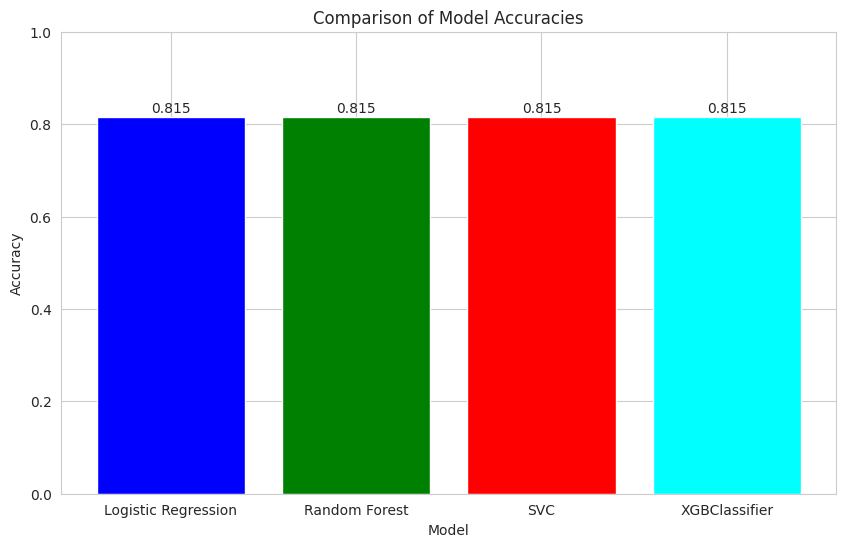

In [49]:
import matplotlib.pyplot as plt

# Assuming best_score_ attributes are from the tuned models
model_names = ['Logistic Regression', 'Random Forest', 'SVC', 'XGBClassifier']
model_scores = [
    log_reg_grid.best_score_,
    rf_grid.best_score_,
    svc_grid.best_score_,
    xgb_grid.best_score_
]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_scores, color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Assuming accuracy scores, adjust if using another metric
for i in range(len(model_scores)):
    plt.text(i, model_scores[i] + 0.01, f"{model_scores[i]:.3f}", ha = 'center')

plt.show()


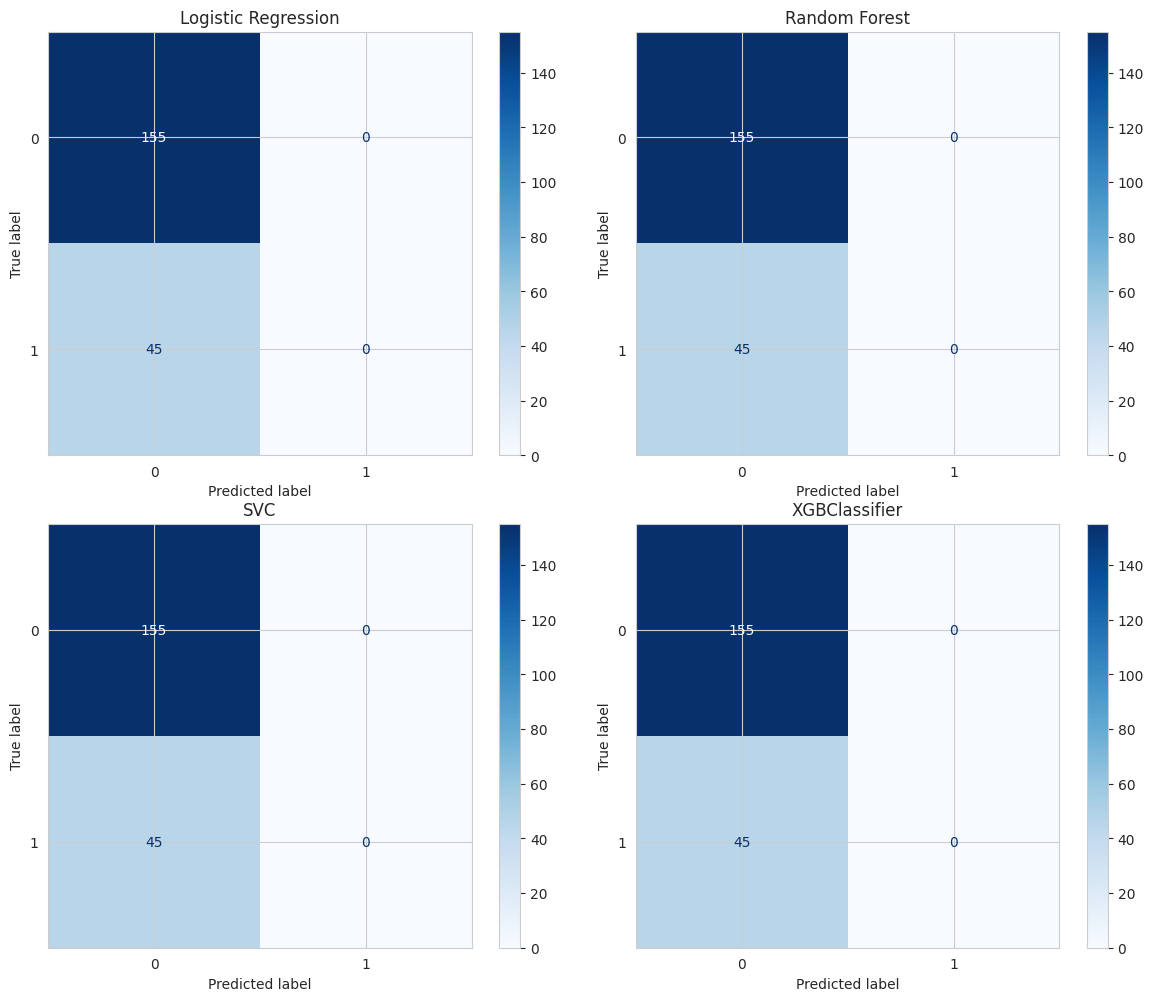

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions with the best models (assuming this step is done)

# Plotting confusion matrices using the updated function
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

ConfusionMatrixDisplay.from_estimator(log_reg_grid.best_estimator_, X_test, y_test, ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Logistic Regression')

ConfusionMatrixDisplay.from_estimator(rf_grid.best_estimator_, X_test, y_test, ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Random Forest')

ConfusionMatrixDisplay.from_estimator(svc_grid.best_estimator_, X_test, y_test, ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('SVC')

ConfusionMatrixDisplay.from_estimator(xgb_grid.best_estimator_, X_test, y_test, ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('XGBClassifier')

plt.tight_layout()
plt.show()
